#### 机器学习的步骤

(1) 选择模型类；

(2) 选择模型超参数；

(3) 用模型拟合训练数据；

(4) 用模型预测新数据的标签。

#### 假如模型效果不好，应该如何改善？答案可能有以下几种。

• 用更复杂 / 更灵活的模型。

• 用更简单 / 更确定的模型。

• 采集更多的训练样本。

• 为每个样本采集更多的特征。

#### 一般来说

• 对于高偏差模型，模型在验证集的表现与在训练集的表现类似。

• 对于高方差模型，模型在验证集的表现远远不如在训练集的表现

#### 关于验证曲线

![1](https://i.loli.net/2019/04/18/5cb7f73b314ba.png)

• 训练得分肯定高于验证得分。一般情况下，模型拟合自己接触过的数据，比拟合没接触过的数据效果要好。

• 使用复杂度较低的模型（高偏差）时，训练数据往往欠拟合，说明模型对训练数据和新数据都缺乏预测能力。

• 而使用复杂度较高的模型（高方差）时，训练数据往往过拟合，说明模型对训练数据预测能力很强，但是对新数据的预测能力很差。

• 当使用复杂度适中的模型时，验证曲线得分最高。说明在该模型复杂度条件下，偏差与方差达到均衡状态。

In [1]:
#采用多项式拟合来说明问题
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#多项式模型
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [2]:
#数据
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

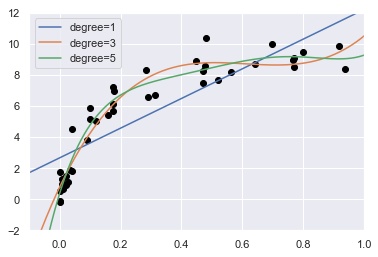

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

## 交叉验证曲线

(21, 10)


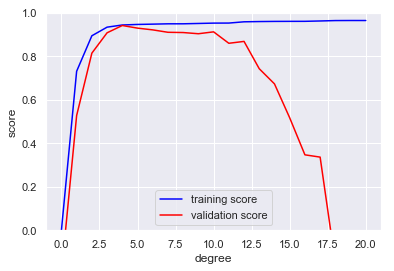

In [8]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)#区间
##validation curse,可以自动比较 进行区间检索
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                           'polynomialfeatures__degree', degree, cv=10)

print(train_score.shape)
# for i in range(0,7):
#     plt.plot(degree, train_score[:,i:i+1].ravel(), color='yellow', label='t score')
# for i in range(0,7):
#     plt.plot(degree, val_score[:,i:i+1].ravel(), color='green', label='v score')
    
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

## 学习曲线

学习曲线的特征包括以下三点。

• 特定复杂度的模型对较小的数据集容易过拟合：此时训练得分较高，验证得分较低。

• 特定复杂度的模型对较大的数据集容易欠拟合：随着数据的增大，训练得分会不断降低，而验证得分会不断升高。

• 模型的验证集得分永远不会高于训练集得分：两条曲线一直在靠近，但永远不会交叉。

当你的学习曲线已经收敛时（即训练曲线和验证曲线已经贴在一起），再增加训练数据也不能再显著改善拟合效果！这种情况就类似于左图显示的二次多项式模型的学习曲线。


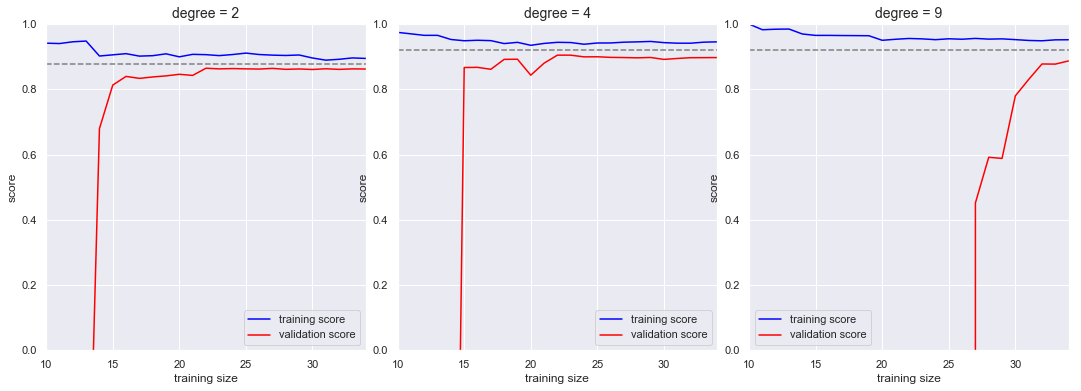

In [15]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2,4, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7
                                         ,train_sizes=np.linspace(0.3, 1, 25)
                                        )

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

## 网格检索

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y);
grid.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

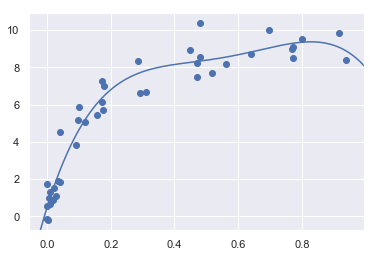

In [16]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);